In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [7]:
from pandas.io.data import DataReader

In [3]:
from datetime import datetime

In [4]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [5]:
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [6]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [11]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,114.694685,115.776772,113.477638,114.636968,4.852808e+07,113.585853
std,11.074061,10.908172,11.155277,10.985169,2.092575e+07,10.367270
min,93.129997,94.500000,92.000000,93.419998,1.304640e+07,92.915814
25%,107.272498,108.724998,105.690001,106.922501,3.429270e+07,106.658961
50%,115.194999,116.355000,113.709999,115.005001,4.449415e+07,113.832406
75%,125.592498,126.392502,124.640004,125.557498,5.519858e+07,123.506332
max,134.460007,134.539993,131.399994,132.649994,1.622063e+08,130.671320


In [12]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2015-04-08 to 2016-04-08
Data columns (total 6 columns):
Open         254 non-null float64
High         254 non-null float64
Low          254 non-null float64
Close        254 non-null float64
Volume       254 non-null int64
Adj Close    254 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.9 KB


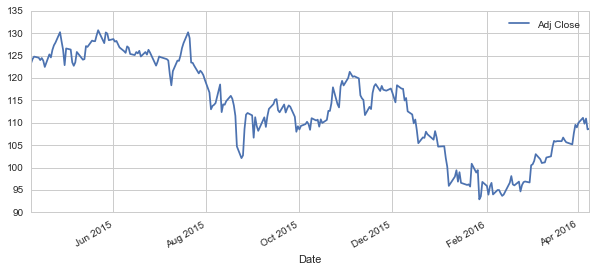

In [14]:
AAPL['Adj Close'].plot(legend = True,figsize = (10,4))

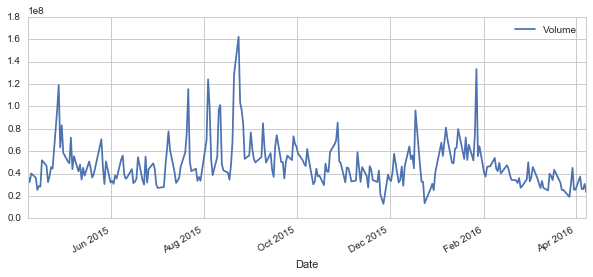

In [17]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [21]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" % (str(ma))
    AAPL[column_name] =pd.rolling_mean(AAPL['Adj Close'],ma)

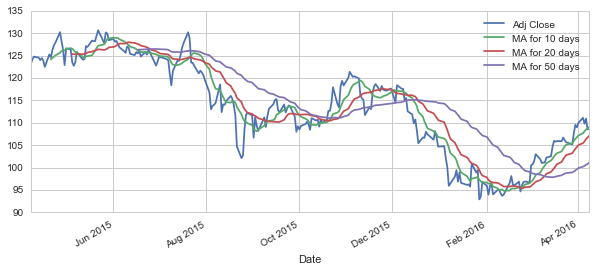

In [22]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots = False,figsize = 
                                                                           (10,4))

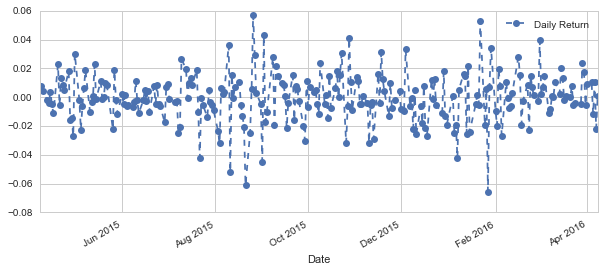

In [23]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(10,4),legend = True, linestyle = '--',marker='o')

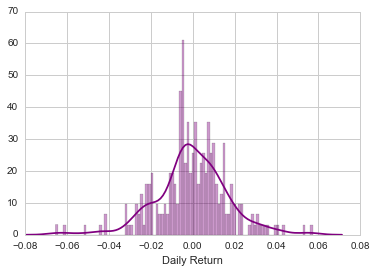

In [24]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

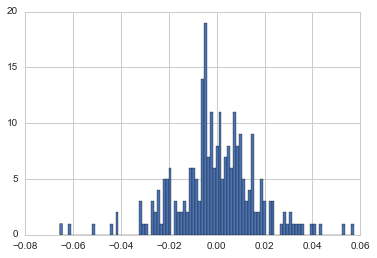

In [25]:
AAPL['Daily Return'].hist(bins=100)

In [26]:
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [27]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-04-08,123.314088,381.200012,541.612446,40.319742
2015-04-09,124.256616,383.540009,540.782472,40.378149
2015-04-10,124.786789,382.649994,540.012416,40.611776
2015-04-13,124.541339,382.359985,539.172466,40.650711
2015-04-14,124.001353,385.109985,530.392405,40.543636


In [28]:
tech_rets = closing_df.pct_change()

In [29]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-04-08,NaN,NaN,NaN,NaN
2015-04-09,0.007643,0.006139,-0.001532,0.001449
2015-04-10,0.004267,-0.002321,-0.001424,0.005786
2015-04-13,-0.001967,-0.000758,-0.001555,0.000959
2015-04-14,-0.004336,0.007192,-0.016284,-0.002634


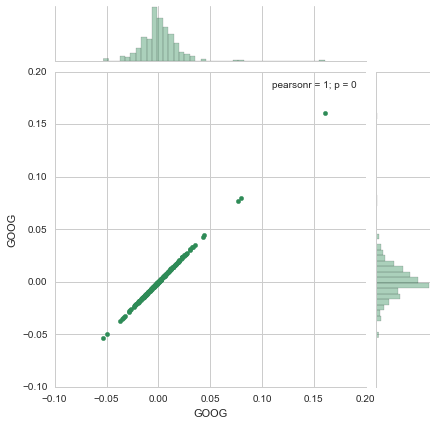

In [30]:
sns.jointplot('GOOG','GOOG',tech_rets,kind ="scatter",color = 'seagreen')

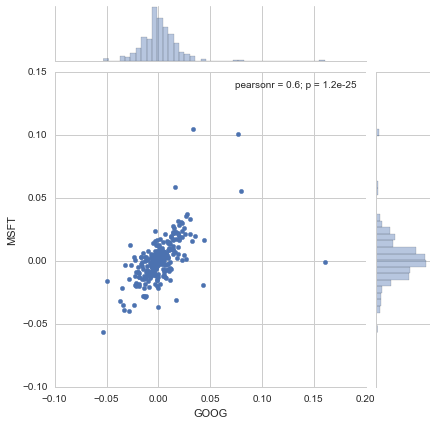

In [31]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

In [33]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-04-08,NaN,NaN,NaN,NaN
2015-04-09,0.007643,0.006139,-0.001532,0.001449
2015-04-10,0.004267,-0.002321,-0.001424,0.005786
2015-04-13,-0.001967,-0.000758,-0.001555,0.000959
2015-04-14,-0.004336,0.007192,-0.016284,-0.002634


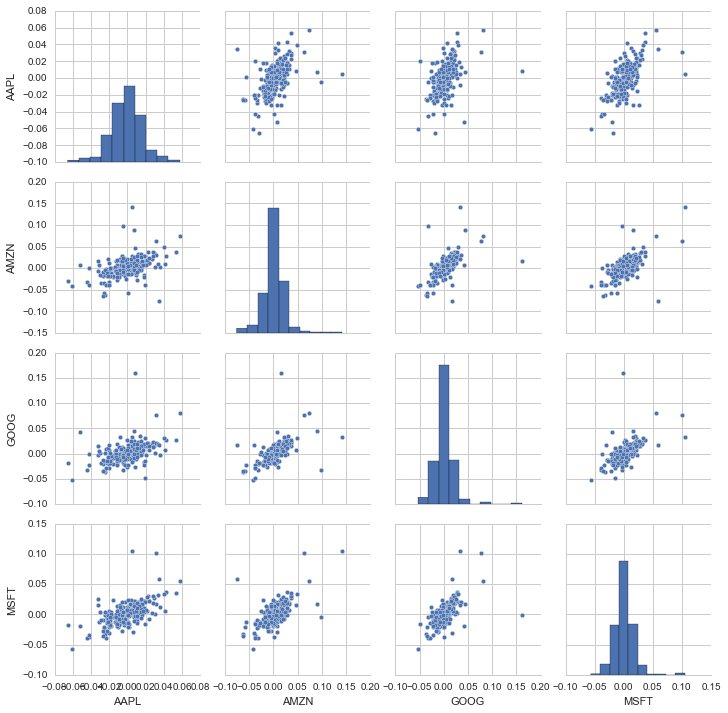

In [34]:
sns.pairplot(tech_rets.dropna())

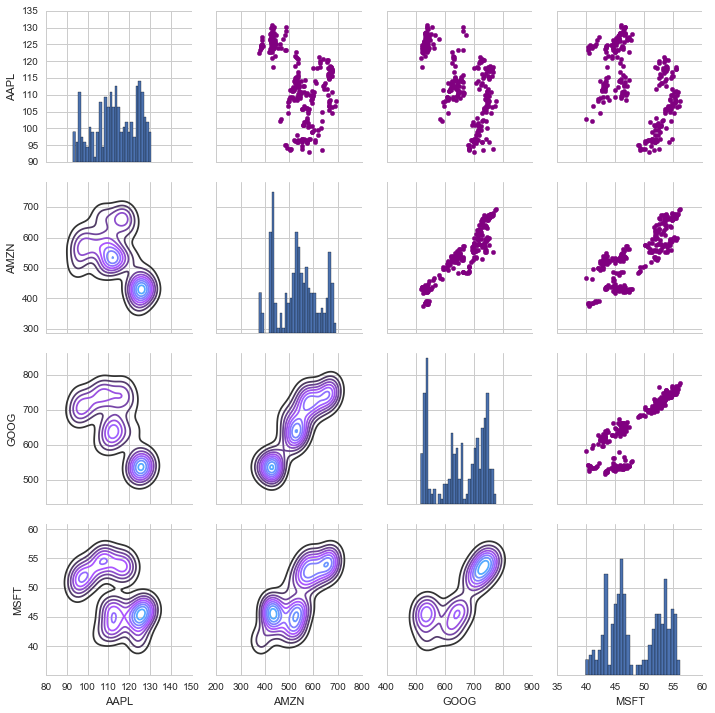

In [37]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

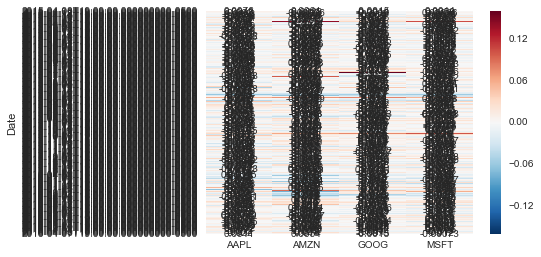

In [39]:
sns.heatmap(tech_rets.dropna(),annot = True)

C:\Users\Bopeng\Anaconda5\lib\site-packages\seaborn\linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Users\Bopeng\Anaconda5\lib\site-packages\seaborn\linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


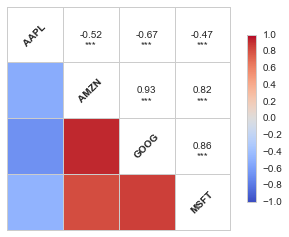

In [41]:
sns.corrplot(closing_df,annot = True)

In [42]:
rets = tech_rets.dropna()

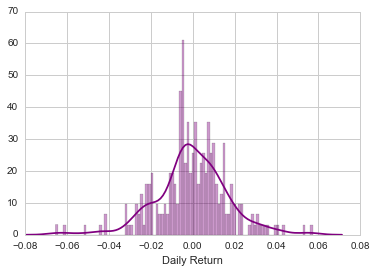

In [47]:
sns.distplot(AAPL['Daily Return'].dropna(),bins = 100, color = 'purple')

In [48]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-04-09,0.007643,0.006139,-0.001532,0.001449
2015-04-10,0.004267,-0.002321,-0.001424,0.005786
2015-04-13,-0.001967,-0.000758,-0.001555,0.000959
2015-04-14,-0.004336,0.007192,-0.016284,-0.002634
2015-04-15,0.003800,-0.004310,0.004035,0.014646


In [49]:
rets['AAPL'].quantile(0.05)

-0.026852540675725865

In [50]:
days = 365 
dt = 1/days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']
def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[x] = mu*dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    return price
        
        

In [51]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-04-08,538.382457,543.852476,538.382457,541.612446,1178500,541.612446
2015-04-09,541.032425,541.952428,535.492451,540.782472,1557800,540.782472
2015-04-10,542.292472,542.292472,537.312445,540.012416,1409400,540.012416
2015-04-13,538.412447,544.062463,537.312445,539.172466,1645300,539.172466
2015-04-14,536.252409,537.572435,528.094416,530.392405,2604100,530.392405


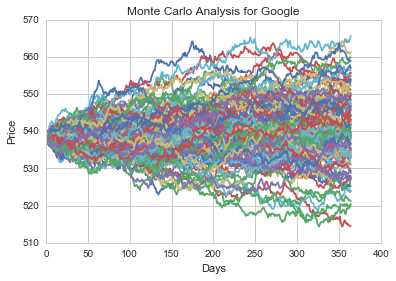

In [52]:
start_price = 538.382457
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [53]:
runs = 10000
simulations = np.zeros(runs)
for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

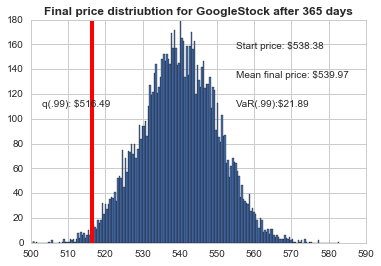

In [55]:
q = np.percentile(simulations,1)
plt.hist(simulations,bins = 200)
plt.figtext(.6,.8, s="Start price: $%.2f" %start_price)
plt.figtext(.6,.7, "Mean final price: $%.2f" % simulations.mean())
plt.figtext(.6,.6,"VaR(.99):$%.2f" % (start_price - q))
plt.figtext(.15,.6,"q(.99): $%.2f" % q)
plt.axvline(x=q, linewidth =4, color = 'r')
plt.title(u"Final price distriubtion for GoogleStock after %s days" % days, weight = 'bold');